In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


%matplotlib inline


In [2]:
df_raw = pd.read_csv("체질검사.csv",engine = "python")
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0


In [3]:
df_raw["BMI"] = df_raw["WEIGHT"]*0.45/((df_raw["HEIGHT"]*0.0254)**2)
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,29.537049
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,26.139558
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,26.060228
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,24.935981


BMI라는 변수를 만들어 BMI를 계산하고 값을 추가해 주었습니다.

In [4]:
df_raw.describe()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,25.736762
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,9.482758
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,17.874982
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,22.853241
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,24.895566
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.118085
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,164.306562


기술통계량을 보면 BMI의 max값을 통해 BMI에 이상치가 있다는 것을 알 수 있습니다.

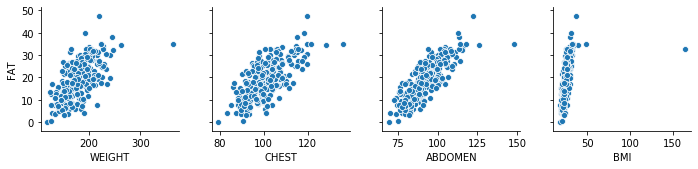

In [5]:
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","CHEST","ABDOMEN","BMI"])

산점도를 통해서도 이상치를 확인할 수 있었습니다.

In [6]:
df_raw[(df_raw["BMI"] >= 100)]

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
78,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.306562


In [7]:
df_raw.loc[(df_raw["BMI"] >= 100),"BMI"] = np.nan 
print(df_raw.isnull().sum())

df_raw = df_raw.dropna()
print(df_raw.isnull().sum())

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
BMI        1
dtype: int64
FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
BMI        0
dtype: int64


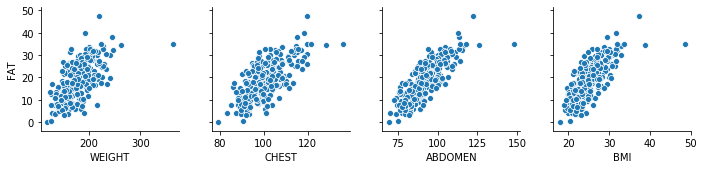

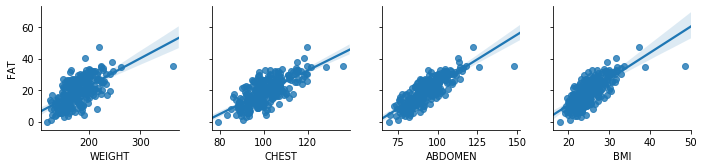

In [8]:
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","CHEST","ABDOMEN","BMI"])
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","CHEST","ABDOMEN","BMI"],kind = "reg")

BMI가 100이 넘는 값을 찾아 결측치로 처리하고 결측치를 제거한 후, 산점도를 다시 그려 회귀 적합선을 추가해 주었습니다.

In [9]:
#상관관계 분석
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.294,0.611,-0.023,0.497,0.703,0.813,0.620,0.554,0.503,0.265,0.493,0.363,0.355,0.725
AGE,0.294,1.000,-0.013,-0.245,0.113,0.177,0.231,-0.050,-0.201,0.018,-0.105,-0.041,-0.085,0.214,0.115
WEIGHT,0.611,-0.013,1.000,0.489,0.835,0.894,0.888,0.944,0.870,0.853,0.614,0.800,0.631,0.735,0.888
HEIGHT,-0.023,-0.245,0.489,1.000,0.321,0.228,0.192,0.378,0.344,0.505,0.394,0.319,0.322,0.397,0.039
NECK,0.497,0.113,0.835,0.321,1.000,0.787,0.759,0.748,0.708,0.680,0.479,0.733,0.624,0.744,0.785
CHEST,0.703,0.177,0.894,0.228,0.787,1.000,0.916,0.833,0.732,0.720,0.483,0.728,0.581,0.664,0.910
ABDOMEN,0.813,0.231,0.888,0.192,0.759,0.916,1.000,0.875,0.766,0.736,0.453,0.685,0.504,0.626,0.922
HIP,0.620,-0.050,0.944,0.378,0.748,0.833,0.875,1.000,0.894,0.821,0.561,0.743,0.550,0.645,0.885
THIGH,0.554,-0.201,0.870,0.344,0.708,0.732,0.766,0.894,1.000,0.797,0.542,0.765,0.572,0.572,0.814
KNEE,0.503,0.018,0.853,0.505,0.680,0.720,0.736,0.821,0.797,1.000,0.613,0.680,0.559,0.675,0.709


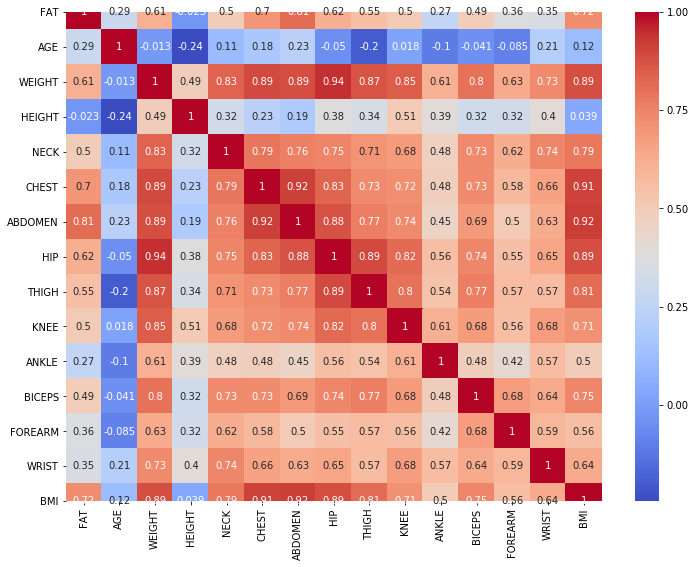

In [13]:
# print(df_raw.corr(method = "pearson").round(3))
plt.figure(figsize = (12, 9))
sns.heatmap(df_raw.corr().round(3), annot = True, cmap = 'coolwarm')
plt.show()

히트맵을 통해 변수들 간의 상관관계를 분석했습니다. ["WEIGHT","CHEST","ABDOMEN","BMI"] 변수가 목표변수 FAT과 큰 상관성이 있었습니다.

In [10]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI",data = df_raw)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     51.59
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.29e-63
Time:                        23:42:46   Log-Likelihood:                -712.18
No. Observations:                 251   AIC:                             1454.
Df Residuals:                     236   BIC:                             1507.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -148.1387     52.793     -2.806      0.0

설명변수 전체에 대해서 선형 회귀 분석을 했습니다. 이 모델은 75.4%의 설명력을 가지고 p값이 유의수준 0.05보다 작기 때문에 회귀모델로서 유의합니다. 하지만 KNEE, ANKLE 같은 유의하지 않은 설명변수가 있어서 모델을 좀 더 수정하기로 했습니다.

In [11]:
df_raw_x = df_raw.drop("FAT",axis = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
10,ANKLE,1.941
12,FOREARM,2.259
1,AGE,2.270
13,WRIST,3.389
11,BICEPS,3.671
4,NECK,4.451
9,KNEE,4.863
8,THIGH,7.864
5,CHEST,10.759
6,ABDOMEN,13.406


설명변수간의 다중공선성을 확인했는데 WEIGHT값의 VIF가 매우 높게 나타났습니다. BMI도 VIF가 매우 높았지만 유의미한 변수이므로 회귀식에서 제거하지 않습니다.

In [12]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST",data = df_raw)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     57.61
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.07e-63
Time:                        23:42:50   Log-Likelihood:                -717.09
No. Observations:                 251   AIC:                             1460.
Df Residuals:                     238   BIC:                             1506.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3921      8.737      1.189      0.2

설명변수 전체에서 WEIGHT를 빼고 다시 회귀 분석을 했습니다. 이 모델은 74.4%의 설명력으로 전체에 대해서 회귀 분석을 했을 때보단 설명력이 약간 떨어지지만 변수들간의 다중공선성 문제가 이전보다 줄어들었습니다.

In [13]:
df_raw_x = df_raw.drop(["FAT","WEIGHT"],axis = 1)
df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.941
11,FOREARM,2.204
1,AGE,2.270
12,WRIST,3.388
10,BICEPS,3.632
3,NECK,4.332
8,KNEE,4.737
2,HEIGHT,5.852
7,THIGH,7.829
4,CHEST,10.759


In [14]:
df_raw_y = df_raw["FAT"]
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)
# rfe.support_  # True, False 값

selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['HEIGHT', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI'], dtype='object')
Removed Variables : Index(['AGE', 'NECK', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


후진제거법을 이용해서 변수중요도가 낮은 순서대로 변수를 제거했습니다. 선택된 변수는 ['HEIGHT', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI']이고 제거된 변수는 ['AGE', 'NECK', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS']입니다

In [20]:
rfe_reg_model = smf.ols(formula = "FAT ~ HEIGHT + ABDOMEN + FOREARM + WRIST + BMI",data = df_raw)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     131.5
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.68e-67
Time:                        23:45:05   Log-Likelihood:                -724.37
No. Observations:                 251   AIC:                             1461.
Df Residuals:                     245   BIC:                             1482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.1913      8.058      1.761      0.0

선택된 변수들로 회귀 모델을 만들었습니다. 설명력이 72.9%로 약간 떨어졌지만 전체에서 9개의 변수를 제거한 것에 비해서 많이 떨어지진 않았습니다.
분석자료 수는 251, 모델의 자유도는 5, 잔차의 자유도는 245입니다. p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하며, 모든 설명변수에 대해 회귀계수가 유의한 것을 알 수 있습니다. 선택된 변수들의 다중공선성을 분석했을 때 BMI의 VIF가 10이 약간 넘지만, 유의미한 변수이므로 제외시키진 않았습니다.

최종 모델의 회귀식은 다음과 같습니다.
$\widehat{a} = 14.1913 - 0.6851HEIGHT + 0.9592ABDOMEN + 0.4562FOREARM - 1.5184WRIST - 0.8359BMI$

In [16]:
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF",inplace = True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/envs/NLP_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,HEIGHT,1.679
3,FOREARM,1.849
4,WRIST,2.304
2,ABDOMEN,8.343
5,BMI,10.069
0,const,846.002


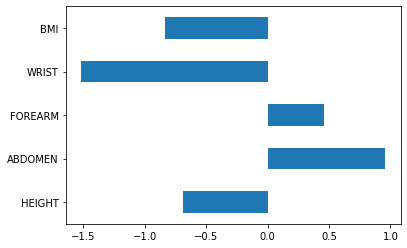

In [17]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

체질 비만도(FAT)에서 가장 중요한 변수는 WRIST이며, 손목의 두께가 얇을수록 체질 비만도가 커짐을 알 수 있습니다. 그 다음으로 중요한 변수는 ABDOMEN인데, 복부 둘레가 커질수록 체질 비만도가 커짐을 알 수 있습니다. BMI와 HEIGHT는 값이 작을 수록 체질비만도가 커지며 FOREARM의 두께가 두꺼울 수록 체질 비만도가 커짐을 bar그래프를 통해서 알 수 있습니다.

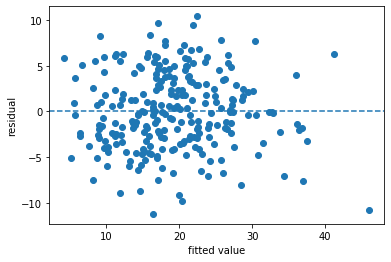

In [22]:
plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

잔차의 산점도를 확인해 볼 때, 잔차가 규칙성 없이 무작위로 나타나며 0을 기준으로 대칭되는 모양을 가지고 있으므로 잔차의 독립성과 등분산성을 만족한다고 할 수 있습니다.

NormaltestResult(statistic=2.732188391478822, pvalue=0.25510139236382423)

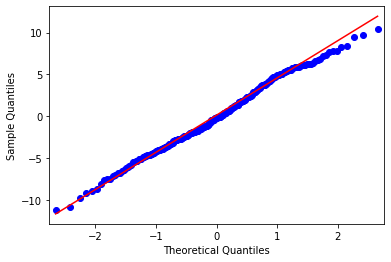

In [23]:
qqplot(reg_result.resid,line="q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid,axis = 0)

Q-Q플롯으로 잔차의 정규성을 검정했을 때, 잔차가 정규분포 직선을 따르며 p값이 유의수준 0.05보다 크므로 잔차가 정규성을 띈다고 할 수 있습니다.

잔차가 정규성, 등분산성, 독립성을 만족합니다. 그러므로 모델이 적합하다고 여기고 최종모델로 선정했습니다.